In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# import modules
from src.features import stat_tests as st
from src.features import calculate_chart_params as cp
from src.features import functions as fn
from src.features import plot_functions as pf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from scipy.stats import skewnorm
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [5]:
from sklearn.preprocessing import PowerTransformer

In [6]:
from statsmodels.graphics.gofplots import qqplot

#### skewnorm dist

In [7]:
skewnorm_series = pd.Series(fn.gen_rv(skewnorm, args=[-50, 0], size = 100))

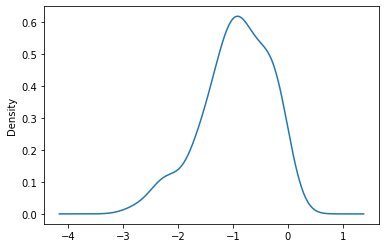

In [8]:
skewnorm_series.plot.kde()

#### Test for normality

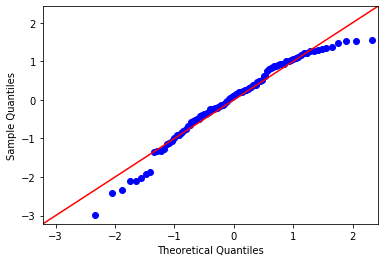

In [9]:
fig = qqplot(skewnorm_series, fit=True, line='45')
plt.show()

In [10]:
st.shapiro_wilks_(skewnorm_series)

Statistics=0.958, p=0.003
Sample does not look Gaussian (reject H0)


In [11]:
st.jarque_bera_(skewnorm_series)

Statistics=7.316, p=0.026, skew=-0.662, kurt=3.067
Sample does not look Gaussian (reject H0)


#### Individual control chart

In [12]:
in_control_mean = skewnorm_series.mean()

In [13]:
MR  = cp.calculate_MR(skewnorm_series)
in_control_sigma = cp.estimate_sigma_from_MR(MR)

In [14]:
in_control_mean, in_control_sigma

(-0.9489042803554613, 0.61855041002632)

In [15]:
x_ind_params0 = cp.x_ind_params(x = skewnorm_series, sigma = in_control_sigma, center=in_control_mean)

In [16]:
x_ind_params0 = x_ind_params0.reset_index()

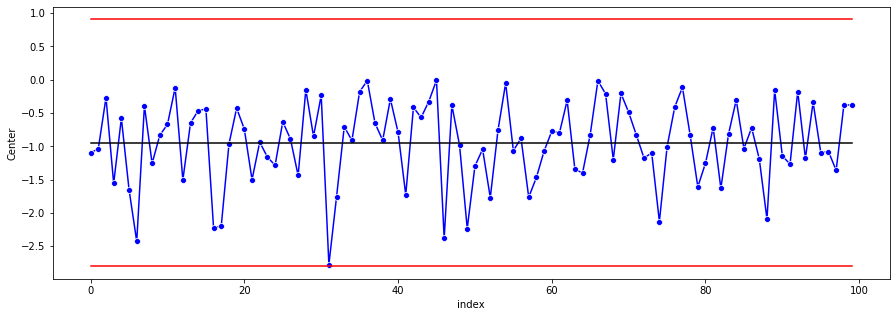

In [17]:
pf.plot_control_chart(
    data=x_ind_params0,
    index='index',
    obs='obs',
    UCL='UCL',
    center='Center',
    LCL='LCL',
    drawstyle='steps-mid',
    title=None,
    ylab=None,
    xlab=None,
    all_dates=False,
    rot=0)

#### Transform skewnorm dist

In [18]:
# Test boxcox
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# boxcox(skewnorm_series)[1]

In [19]:
pt = PowerTransformer(method='yeo-johnson', standardize=False, copy=True)
# pt = PowerTransformer(method='box-cox', standardize=False, copy=True)

In [20]:
pt_fitted = pt.fit(skewnorm_series.values.reshape(-1, 1))

In [21]:
skewnorm_series_transformed = pd.Series(pt_fitted.transform(skewnorm_series.values.reshape(-1, 1)).flatten())

In [22]:
lambda_bc = pt_fitted.lambdas_

In [23]:
lambda_bc

array([1.98773632])

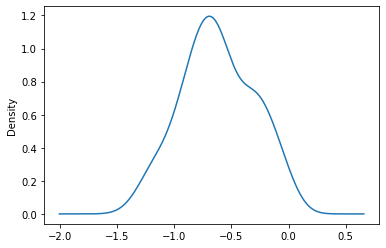

In [24]:
skewnorm_series_transformed.plot.kde()

#### Test for normality

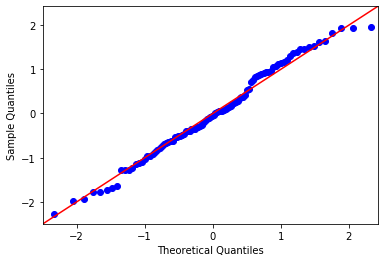

In [25]:
fig = qqplot(skewnorm_series_transformed, fit=True, line='45')
plt.show()

In [26]:
st.shapiro_wilks_(skewnorm_series_transformed)

Statistics=0.984, p=0.252
Sample looks Gaussian (fail to reject H0)


In [27]:
st.jarque_bera_(skewnorm_series_transformed)

Statistics=1.735, p=0.420, skew=0.001, kurt=2.355
Sample looks Gaussian (fail to reject H0)


#### Individual control chart (transformed)

In [28]:
in_control_mean = skewnorm_series_transformed.mean()

In [29]:
MR  = cp.calculate_MR(skewnorm_series_transformed)
in_control_sigma = cp.estimate_sigma_from_MR(MR)

In [30]:
in_control_mean, in_control_sigma

(-0.6218345941747181, 0.32648254257322495)

In [31]:
x_ind_params = cp.x_ind_params(x = skewnorm_series_transformed, sigma = in_control_sigma, center=in_control_mean)

In [32]:
x_ind_params = x_ind_params.reset_index()

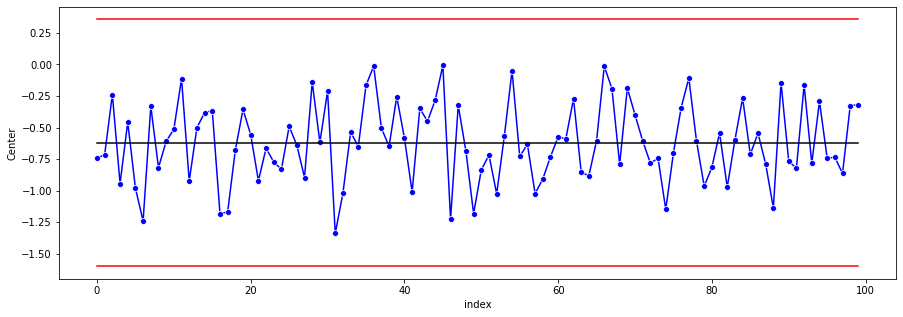

In [33]:
pf.plot_control_chart(
    data=x_ind_params,
    index='index',
    obs='obs',
    UCL='UCL',
    center='Center',
    LCL='LCL',
    drawstyle='steps-mid',
    title=None,
    ylab=None,
    xlab=None,
    all_dates=False,
    rot=0)

#### Back transform to original

In [34]:
x_ind_params2 = x_ind_params.copy()

In [35]:
x_ind_params2['obs'] = pt_fitted.inverse_transform(x_ind_params2['obs'].values.reshape(-1, 1))
x_ind_params2['UCL'] = pt_fitted.inverse_transform(x_ind_params2['UCL'].values.reshape(-1, 1))
x_ind_params2['Center'] = pt_fitted.inverse_transform(x_ind_params2['Center'].values.reshape(-1, 1))
x_ind_params2['LCL'] = pt_fitted.inverse_transform(x_ind_params2['LCL'].values.reshape(-1, 1))

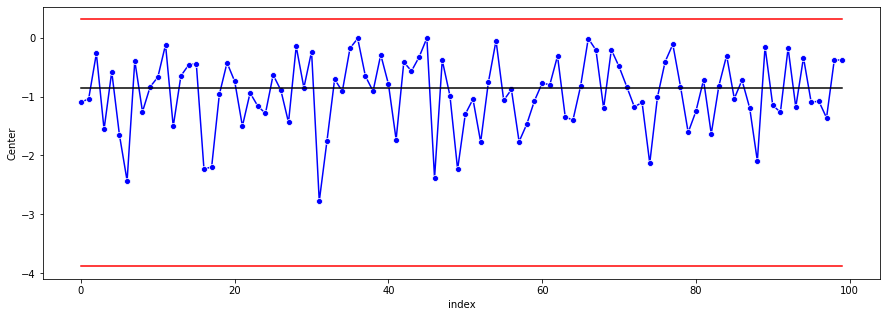

In [36]:
pf.plot_control_chart(
    data=x_ind_params2,
    index='index',
    obs='obs',
    UCL='UCL',
    center='Center',
    LCL='LCL',
    drawstyle='steps-mid',
    title=None,
    ylab=None,
    xlab=None,
    all_dates=False,
    rot=0)